<p style="font-size:20px">You may need to install <b>tqdm</b> and <b>cv2</b>. Simply do <b>conda install tqdm</b> and <b>conda install cv2</b> in your virtual environment. You are also free to use other tools to fetch the image files and resize them.</p>

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
import pickle
import os
import cv2 as cv
import timeit

<p style="font-size:20px">In Problem 4a, you will preprocess the dogs and cats data and save them into "Pickle" files for later use.

In [15]:
train_dir = "dogs-vs-cats/train"
test_dir = "dogs-vs-cats/test1"

<p style="font-size:20px">Step 1: Kaggle does not provide a file that contains the labels. So we need to create labels from the training file.

In [16]:
"""
a function to return the label of a image
input: 
    image
return:
    if the image is cat, return [1,0]
    if the image is dog, return [0,1]
"""
def label_img(img):
    label = img[0:3]
    if label == 'cat':
        return np.array([1,0])
    return np.array([0,1])

<p style="font-size:20px">Step 2: define a function to fetch all images from the training directory and return a <b>list</b> that every element contains two <b>Numpy array</b>:image and its label.

In [17]:
"""
Hint 1: use tqdm to fetch file
    for file in tqdm(os.listdir(directory)):
        ...

Hint 2: use cv2 to read file
    cv2.imread(path)

Hint 3: use cv2 to resize img
    cv2.resize(img, (size, size))
"""
def create_train_data():
    train = []
    for f in tqdm(os.listdir(train_dir)):
        label = label_img(f)
        img = cv.imread(os.path.join(train_dir, f))
        img = cv.resize(img, (227,227))
        train.append([img, label])
        
    shuffle(train)
    return train

<p style="font-size:20px">Step 3: define a similar function to fetch all test data. You don't need to label them.

In [18]:
def create_test_data():
    test = []
    for f in tqdm(os.listdir(test_dir)):
        img = cv.imread(os.path.join(test_dir, f))
        img = cv.resize(img, (227,227))
        test.append(img)
    shuffle(test)
    return test

<p style="font-size:20px">Step 4: create your train and test data</p>

In [19]:
train = create_train_data()
test = create_test_data()

100%|████████████████████████████████████████████████████████████████████████████| 12500/12500 [02:55<00:00, 71.03it/s]


<p style="font-size:20px"> You can visualize the image using plt.imshow()

(227, 227, 3)
[0 1]


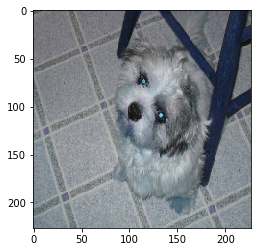

In [20]:
plt.imshow(train[212][0])
print(train[212][0].shape)
print(train[212][1])

<p style="font-size:20px">Step 5: Reshape all images to have shape (#, 227, 227, 3). Use 500 training data as your validation set.

In [21]:
print(test[0].shape, train[0][0].shape)
# for i in range(len(train)):
#     train[i][0] = train[i][0].reshape((1, 227, 227, 3))
# for i in range(len(test)):
#     test[i] = test[i].reshape((1, 227, 227, 3))
val, train = train[:500], train[500:]

(227, 227, 3) (227, 227, 3)


<p style="font-size:20px">Step 6: Save training data, validation data and testing data as Pickle object</p>
<p style="font-size:20px">Note: You can't save all training data into one file because it has several Gigabytes. Separate your data wisely and save them into different files</p>

In [22]:
for i in range ((25000 - 500)// 5000):
    with open('train_' + str (i) + '.pickle', 'wb') as f:
        pickle.dump(train[i * 5000: (i+1) * 5000], f)
with open('train_' + str (4) + '.pickle', 'wb') as f:
    pickle.dump(train[20000:], f)

for i in range ((12500)// 2500):
    with open('test_' + str (i) + '.pickle', 'wb') as f:
        pickle.dump(test[i * 2500: (i+1) * 2500], f)

with open('val.pickle', 'wb') as f:
    pickle.dump(val, f)